# 結果比較

In [1]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
def discon_flg(df):
    df['discon_flg'] = (df['discon_cnt'] > 0).astype(int)
    return df

In [3]:
# 比較元
BEFORE_CSV = os.path.join('/home', 'jupyter', 'work', 'result', '20230129_0046_max_min_euc_dist_03_test_stress_main_test.csv')
before_df = pd.read_csv(BEFORE_CSV)
before_df = discon_flg(before_df)

# 比較先
AFTER_CSV = os.path.join('/home', 'jupyter', 'work', 'result', '20230129_1525_avoid_bypass_03_test_stress_main.csv')
after_df = pd.read_csv(AFTER_CSV)
after_df = discon_flg(after_df)

In [4]:
compare_cols = ['cost', 'discon_flg', 'discon_cnt', 'time']

before_df.columns = [c + '_before' if c in compare_cols else c for c in before_df.columns]

cols = compare_cols.copy()
cols.append('seed')
after_df = after_df[cols]
after_df.columns = [c + '_after' if c in compare_cols else c for c in after_df.columns]

In [5]:
merge_df = pd.merge(before_df, after_df, on=['seed'], how='left')
merge_df

,testset,seed,N,M,D,K,time_before,cost_before,discon_cnt_before,discon_flg_before,cost_after,discon_flg_after,discon_cnt_after,time_after
0,03_test_stress,0,791,2277,11,361,2838,10447535,0,0,10408650,0,0,3130
1,03_test_stress,1,623,1146,25,70,1201,14323787,0,0,14355201,0,0,678
2,03_test_stress,2,898,1576,8,356,1498,614052174,3584,1,334384210,1,1794,1508
3,03_test_stress,3,830,1605,12,209,1534,26342149,0,0,26492277,0,0,985
4,03_test_stress,4,700,1500,14,112,1424,16142516,0,0,16140611,0,0,1185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,03_test_stress,9995,879,1701,7,384,1833,50195819,0,0,47586445,0,0,1419
9996,03_test_stress,9996,878,1532,15,115,1332,330432751,3504,1,179550290,1,1754,1441
9997,03_test_stress,9997,731,1537,30,75,1504,98632378,1460,1,98628085,1,1460,1274
9998,03_test_stress,9998,742,1778,5,614,1274,45966030,0,0,40662549,0,0,1270


In [6]:
np.mean(merge_df['cost_after'])

78819049.9296

In [7]:
# 辺密度(0.01刻み)
merge_df['edge_density'] = merge_df['M'] / merge_df['N']
merge_df['edge_density'] = round(100  * merge_df['edge_density']) / 100

In [11]:
# スケジュールのタイトさ(0.01刻み)
merge_df['sche_room'] = merge_df['K'] / (merge_df['M'] / merge_df['D'])
merge_df['sche_room'] = round(100  * merge_df['sche_room']) / 100

In [24]:
# 刻み幅の調整
merge_df['N_class'] = merge_df['N'] // 10 * 10
merge_df['M_class'] = merge_df['M'] // 10 * 10

In [25]:
merge_df['M_class']

0       2270
1       1140
2       1570
3       1600
4       1500
        ... 
9995    1700
9996    1530
9997    1530
9998    1770
9999    1880
Name: M_class, Length: 10000, dtype: int64

## 全体比較(コスト)

In [12]:
def y_plot(y):
    val_list = []
    
    for postfix in ('before', 'after'):
        col = y + '_' + postfix
        
        val = np.mean(merge_df[col])
        val_list.append(val)
        
        print('{}: {:.1f}'.format(postfix, val))
    
    plt.title(y)
    plt.bar(['before', 'after'], val_list);

before: 206861415.6
after: 78819049.9


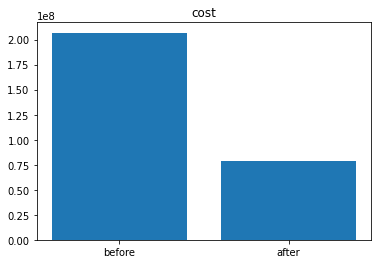

In [13]:
y_plot('cost')

In [14]:
def xy_plot(x, y):
    plot_df = merge_df.groupby(x).mean()

    for postfix in ('before', 'after'):
        col = y + '_' + postfix

        plt.plot(plot_df.index, plot_df[col], label=postfix)

    plt.title(y)
    plt.xlabel(x)
    plt.legend();    

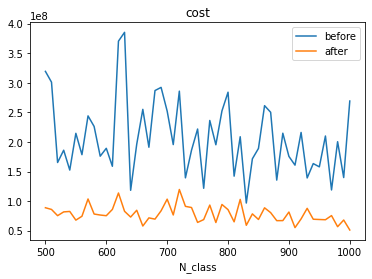

In [23]:
xy_plot('N_class', 'cost')

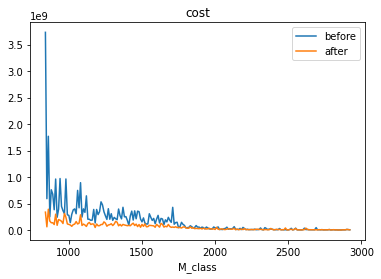

In [27]:
xy_plot('M_class', 'cost')

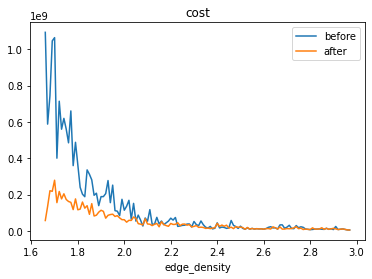

In [28]:
xy_plot('edge_density', 'cost')

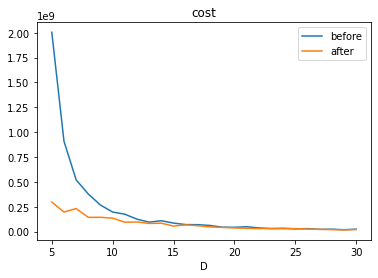

In [29]:
xy_plot('D', 'cost')

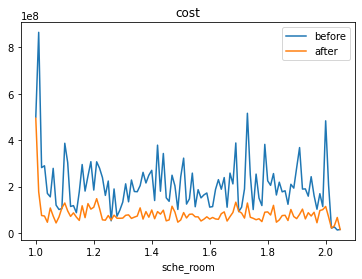

In [31]:
xy_plot('sche_room', 'cost')

## 非連結フラグ

before: 0.2
after: 0.2


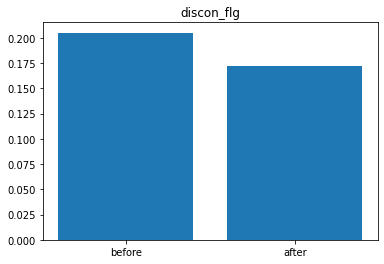

In [32]:
y_plot('discon_flg')

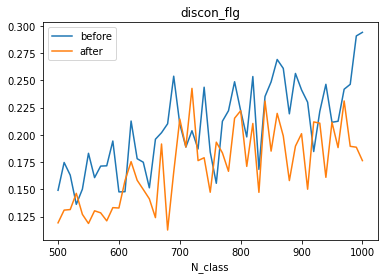

In [33]:
xy_plot('N_class', 'discon_flg')

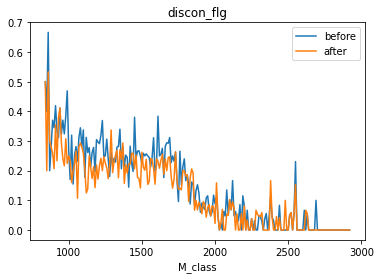

In [34]:
xy_plot('M_class', 'discon_flg')

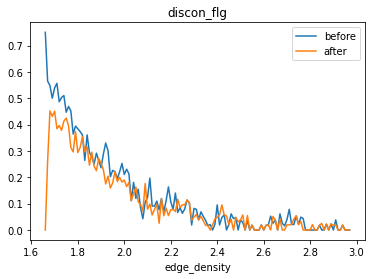

In [35]:
xy_plot('edge_density', 'discon_flg')

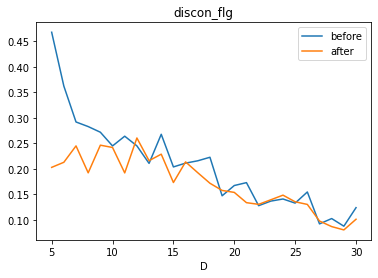

In [36]:
xy_plot('D', 'discon_flg')

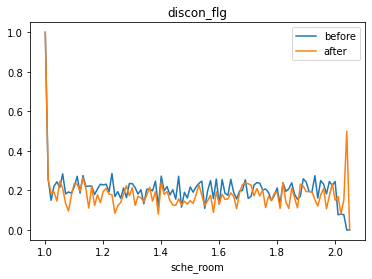

In [38]:
xy_plot('sche_room', 'discon_flg')